# Import necessary libraries

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, auc, roc_curve, accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility

In [35]:
np.random.seed(42)

## Data Collection

In [36]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/CreditCardFraudDetection/creditcard.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Preprocessing and Exploration

## Check the shape of the dataset

In [37]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (284807, 31)


## Display the first few rows

In [38]:
print("\nFirst 5 rows:")
print(df.head())


First 5 rows:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26      

## Check for missing values

In [39]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


# Check for duplicates

In [40]:
print(f"\nDuplicate rows: {df.duplicated().sum()}")


Duplicate rows: 1081


## Dataset information

In [41]:
print("\nDataset info:")
print(df.info())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64


## Summary statistics

In [42]:
print(df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

## Class distribution (0: Normal, 1: Fraud)

In [43]:
fraud_percent = df['Class'].value_counts()[1] / df.shape[0] * 100
print(f"Percentage of fraudulent transactions: {fraud_percent:.4f}%")

Percentage of fraudulent transactions: 0.1727%


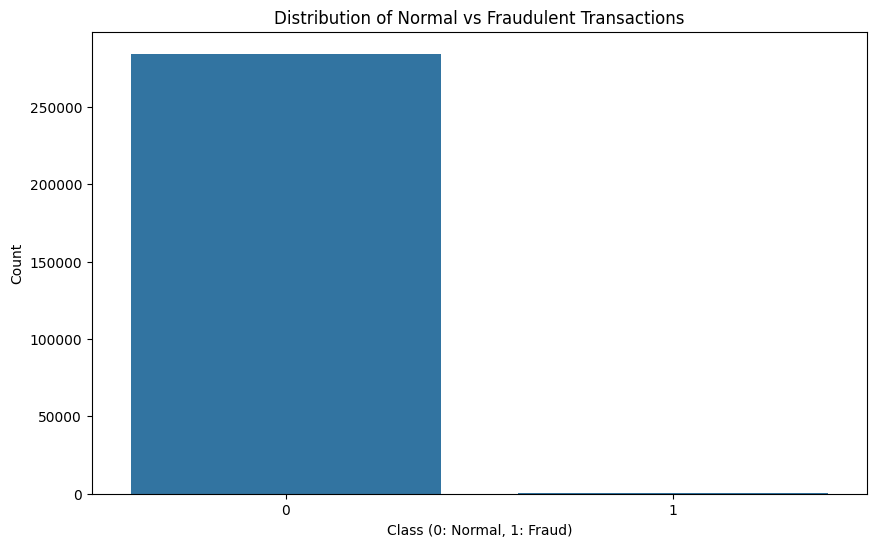

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', data=df)
plt.title('Distribution of Normal vs Fraudulent Transactions')
plt.xlabel('Class (0: Normal, 1: Fraud)')
plt.ylabel('Count')
plt.show()

## Plot the distribution of transaction amounts

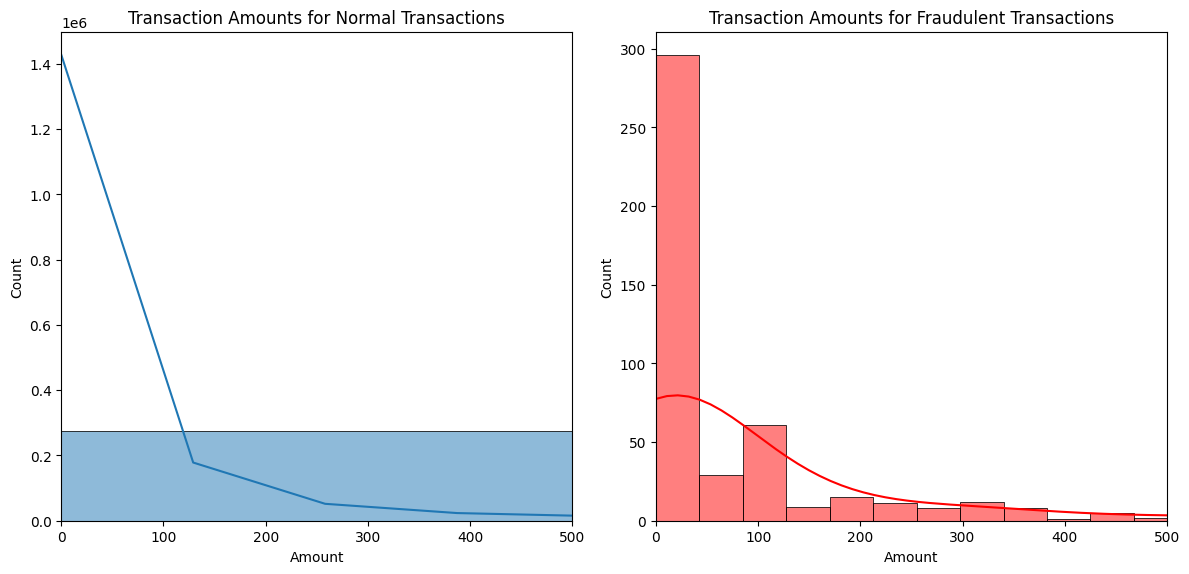

In [45]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df[df['Class'] == 0]['Amount'], bins=50, kde=True)
plt.title('Transaction Amounts for Normal Transactions')
plt.xlabel('Amount')
plt.xlim([0, 500])

plt.subplot(1, 2, 2)
sns.histplot(df[df['Class'] == 1]['Amount'], bins=50, kde=True, color='red')
plt.title('Transaction Amounts for Fraudulent Transactions')
plt.xlabel('Amount')
plt.xlim([0, 500])

plt.tight_layout()
plt.show()

## Time distribution of transactions

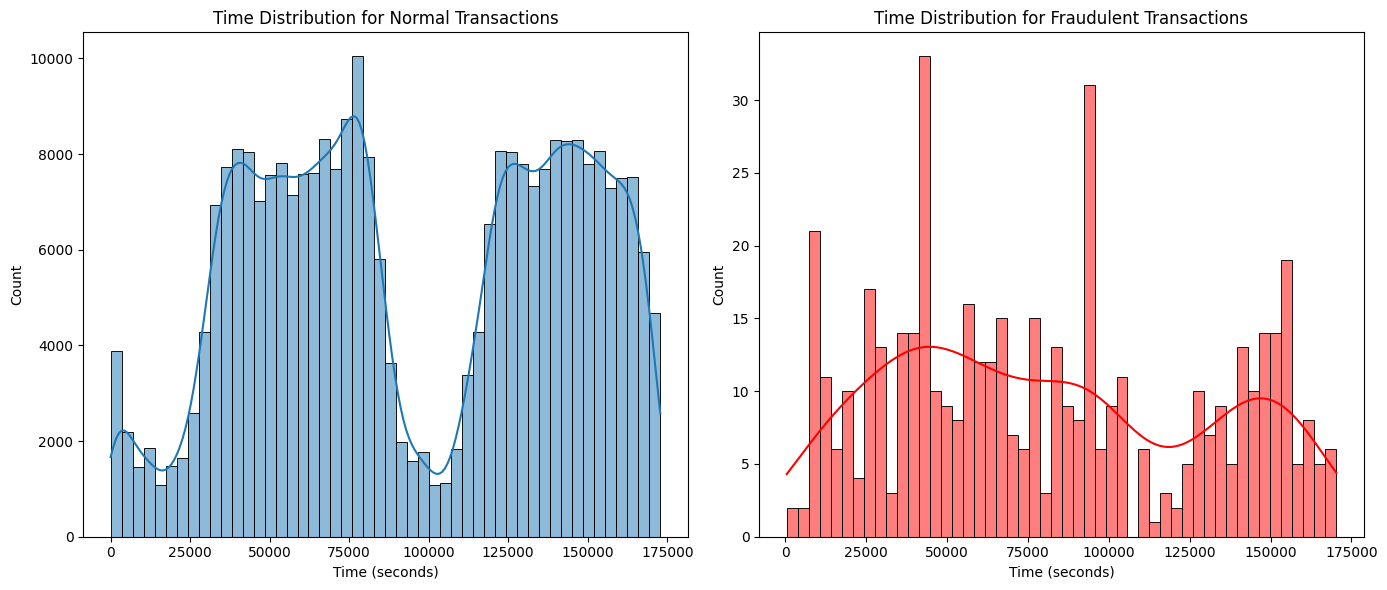

In [46]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df[df['Class'] == 0]['Time'], bins=50, kde=True)
plt.title('Time Distribution for Normal Transactions')
plt.xlabel('Time (seconds)')

plt.subplot(1, 2, 2)
sns.histplot(df[df['Class'] == 1]['Time'], bins=50, kde=True, color='red')
plt.title('Time Distribution for Fraudulent Transactions')
plt.xlabel('Time (seconds)')

plt.tight_layout()
plt.show()

## Correlation matrix of features

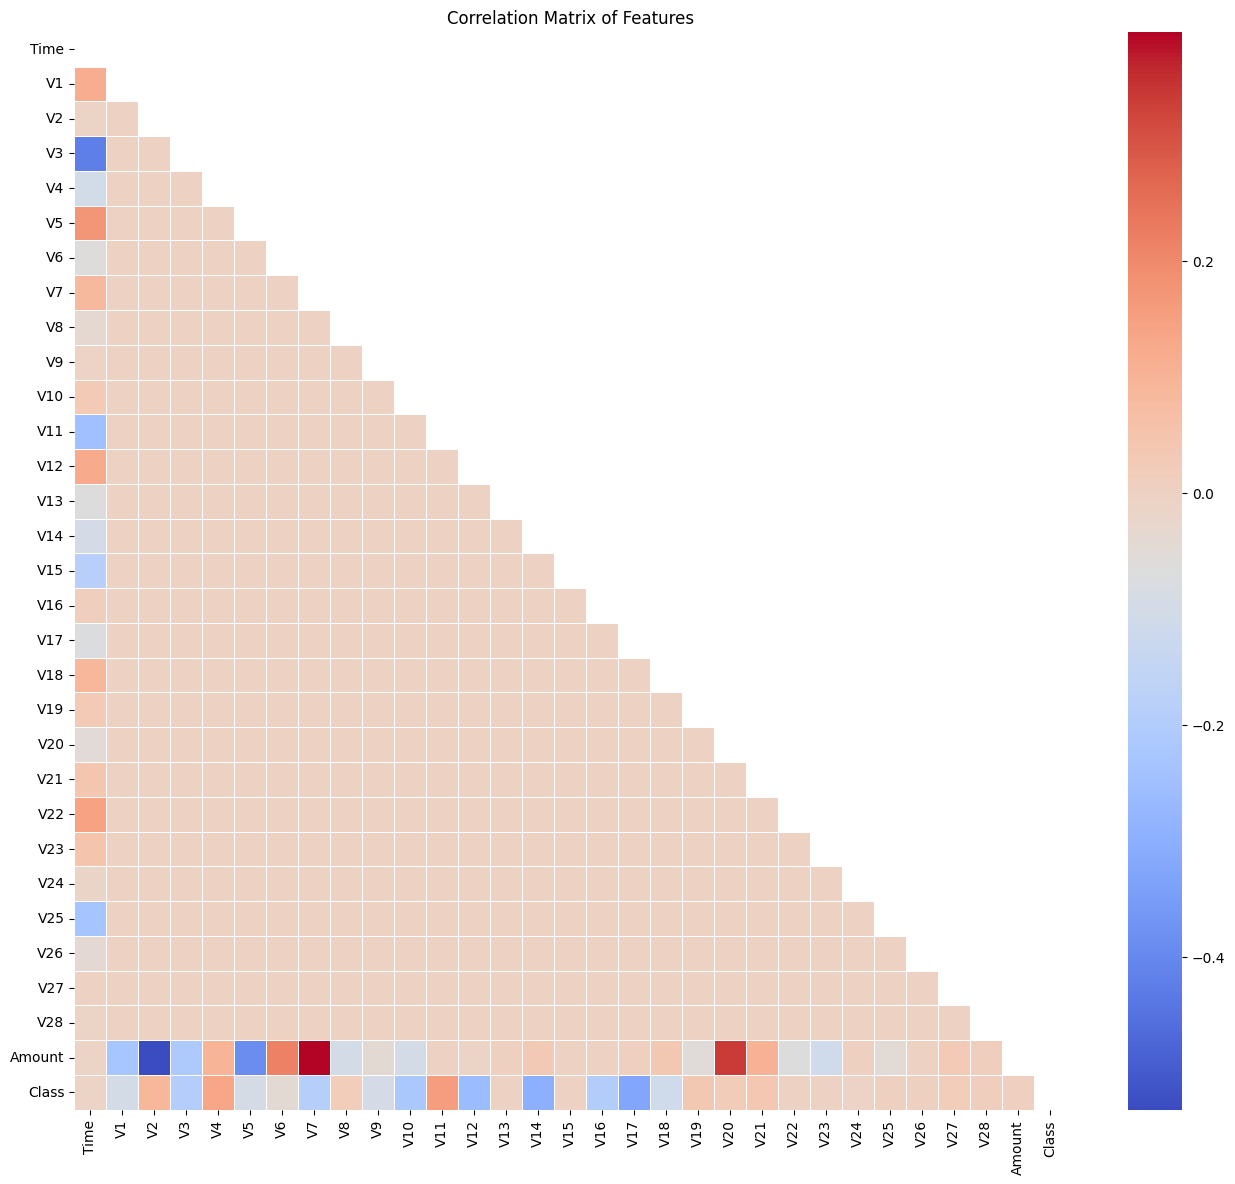

In [47]:
plt.figure(figsize=(16, 14))
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

## Look at correlations with the target variable

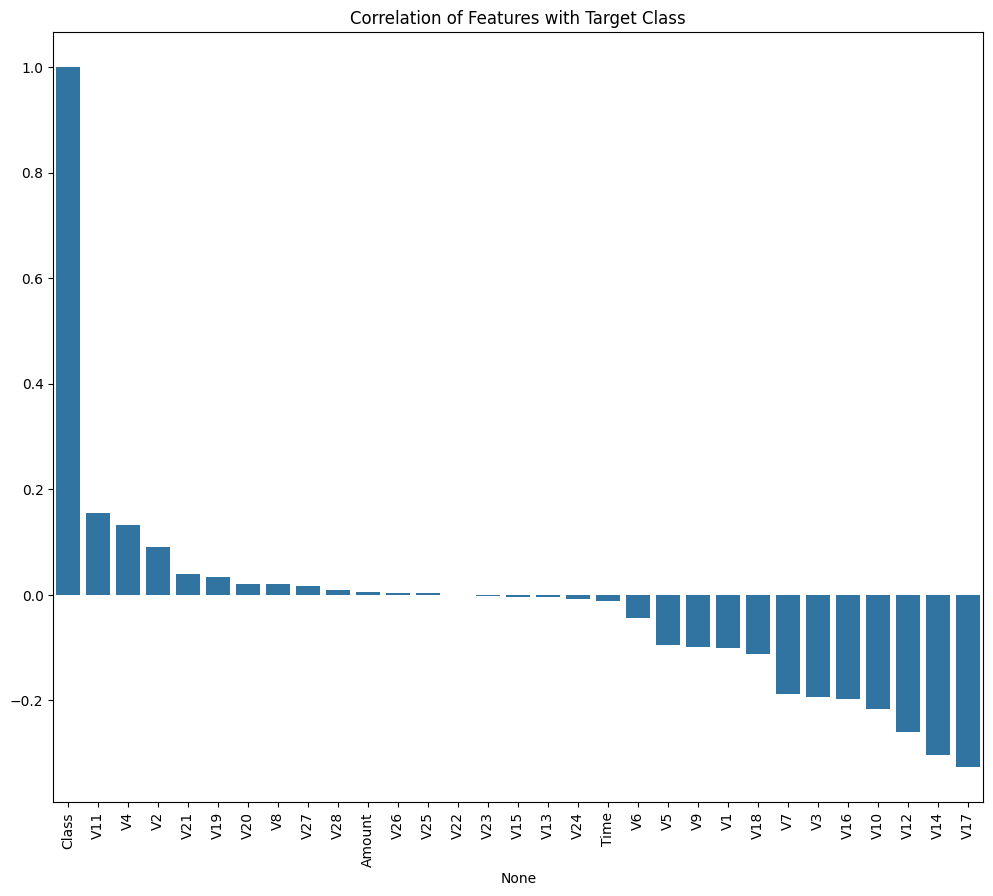

In [48]:
plt.figure(figsize=(12, 10))
correlations = df.corr()['Class'].sort_values(ascending=False)
sns.barplot(x=correlations.index, y=correlations.values)
plt.title('Correlation of Features with Target Class')
plt.xticks(rotation=90)
plt.show()

### Feature Engineering and Preprocessing

In [49]:
# Normalize 'Amount' and 'Time' features
df['Amount_norm'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df['Time_norm'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1, 1))

# Drop the original 'Amount' and 'Time' columns
df = df.drop(['Amount', 'Time'], axis=1)

# Prepare the data for modeling
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Frauds in training set: {sum(y_train == 1)}")
print(f"Frauds in testing set: {sum(y_test == 1)}")

Training set shape: (227845, 30)
Testing set shape: (56962, 30)
Frauds in training set: 394
Frauds in testing set: 98


## Building and Evaluating Models
### Logistic Regression Model

In [50]:
# Train a logistic regression model
lr_model = LogisticRegression(max_iter=1000, class_weight='balanced')
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_prob_lr = lr_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Logistic Regression Model Evaluation:")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

# Calculate metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1 Score: {f1_lr:.4f}")

Logistic Regression Model Evaluation:

Confusion Matrix:
[[55475  1389]
 [    8    90]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962

Accuracy: 0.9755
Precision: 0.0609
Recall: 0.9184
F1 Score: 0.1141


## ROC Curve

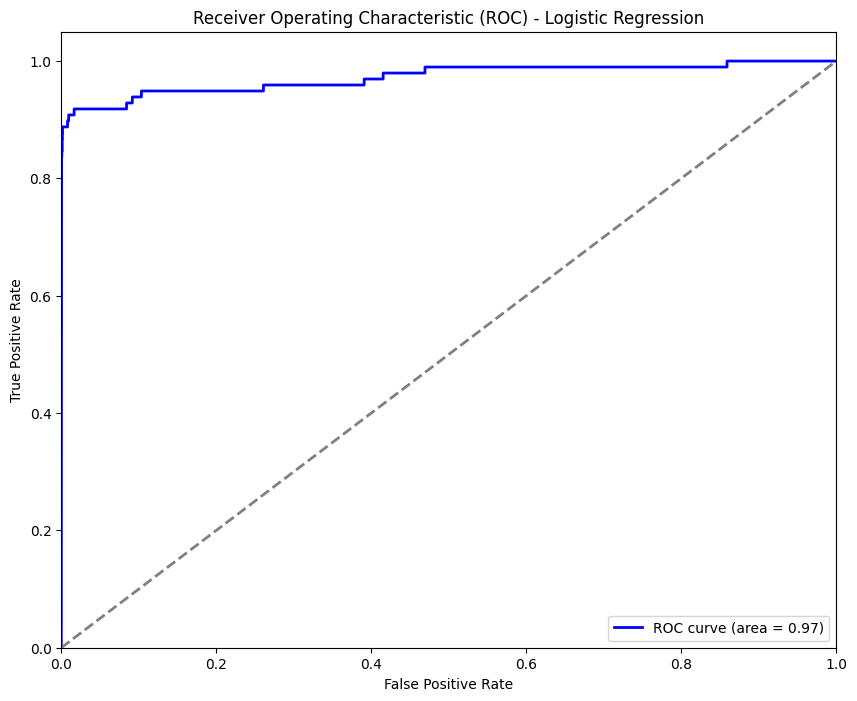

In [51]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

## Precision-Recall Curve

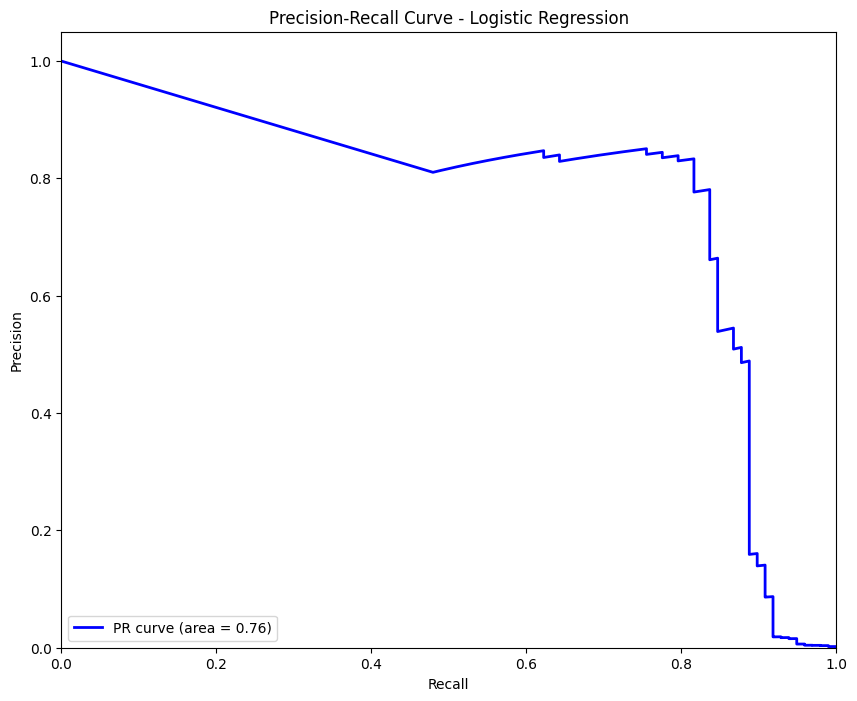

In [52]:
precision_lr_curve, recall_lr_curve, _ = precision_recall_curve(y_test, y_pred_prob_lr)
pr_auc_lr = auc(recall_lr_curve, precision_lr_curve)

plt.figure(figsize=(10, 8))
plt.plot(recall_lr_curve, precision_lr_curve, color='blue', lw=2, label=f'PR curve (area = {pr_auc_lr:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Logistic Regression')
plt.legend(loc="lower left")
plt.show()

## Random Forest Model

In [53]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

### Make predictions & Evaluate the model

In [54]:
y_pred_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]

print("Random Forest Model Evaluation:")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Model Evaluation:

Confusion Matrix:
[[56861     3]
 [   24    74]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.76      0.85        98

    accuracy                           1.00     56962
   macro avg       0.98      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962



### Calculate metrics

In [55]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")

Accuracy: 0.9995
Precision: 0.9610
Recall: 0.7551
F1 Score: 0.8457


## ROC Curve

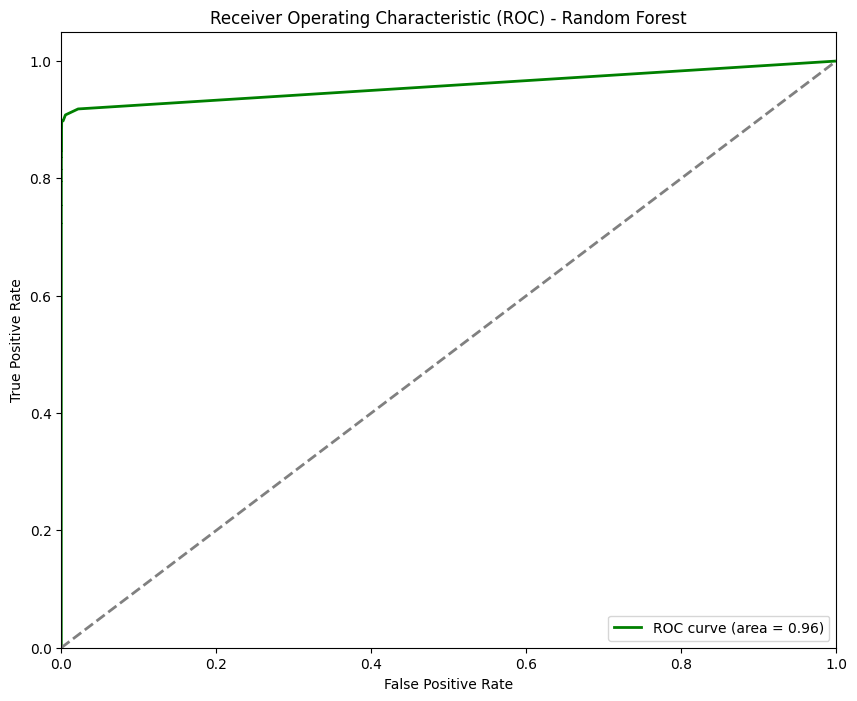

In [56]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(10, 8))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Random Forest')
plt.legend(loc="lower right")
plt.show()

## Precision-Recall Curve

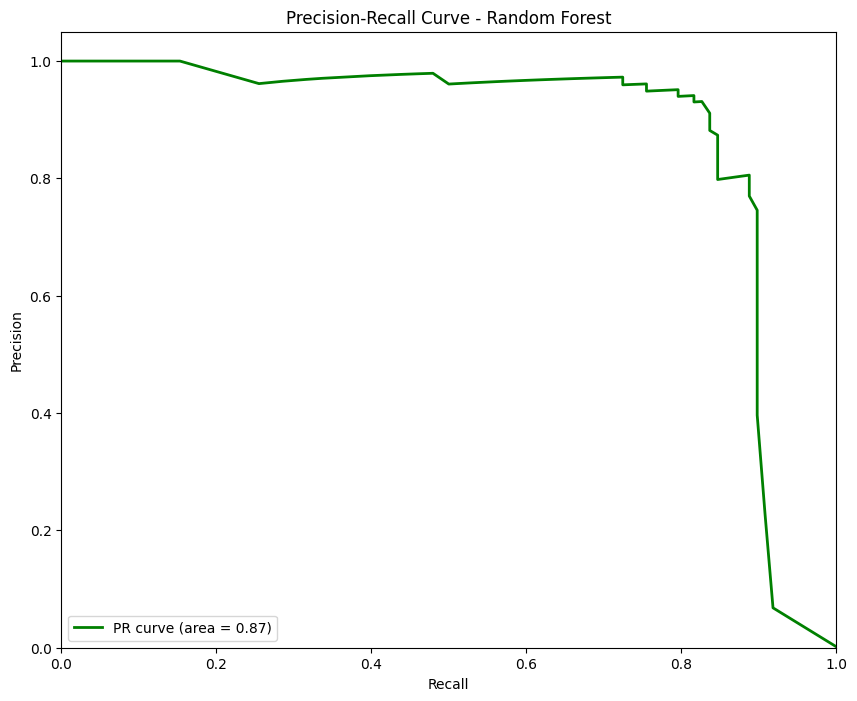

In [57]:
precision_rf_curve, recall_rf_curve, _ = precision_recall_curve(y_test, y_pred_prob_rf)
pr_auc_rf = auc(recall_rf_curve, precision_rf_curve)

plt.figure(figsize=(10, 8))
plt.plot(recall_rf_curve, precision_rf_curve, color='green', lw=2, label=f'PR curve (area = {pr_auc_rf:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Random Forest')
plt.legend(loc="lower left")
plt.show()

## Feature importance

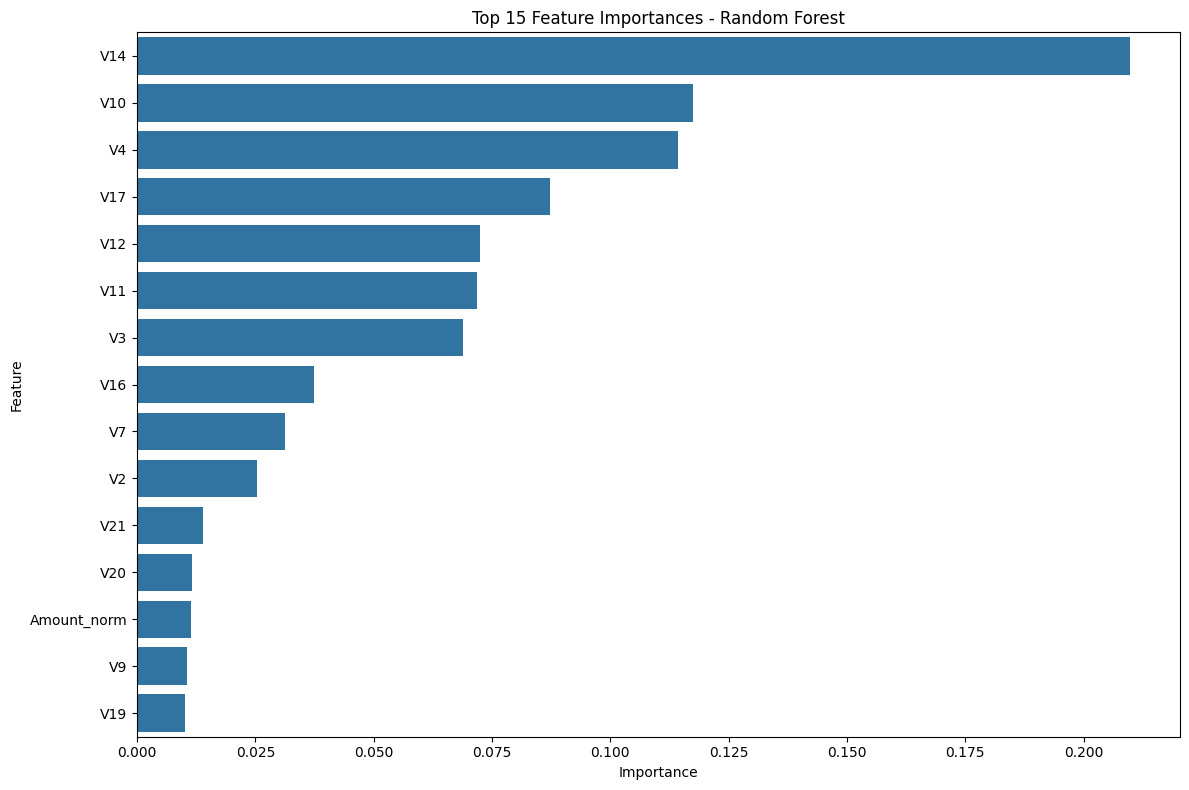

In [58]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
plt.title('Top 15 Feature Importances - Random Forest')
plt.tight_layout()
plt.show()

## Compare Models

### Compare model performance

In [59]:
models = ['Logistic Regression', 'Random Forest']
accuracy_scores = [accuracy_lr, accuracy_rf]
precision_scores = [precision_lr, precision_rf]
recall_scores = [recall_lr, recall_rf]
f1_scores = [f1_lr, f1_rf]
roc_auc_scores = [roc_auc_lr, roc_auc_rf]
pr_auc_scores = [pr_auc_lr, pr_auc_rf]

comparison_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores,
    'ROC AUC': roc_auc_scores,
    'PR AUC': pr_auc_scores
})

print("Model Comparison:")
print(comparison_df)

Model Comparison:
                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC  \
0  Logistic Regression  0.975475   0.060852  0.918367  0.114141  0.972167   
1        Random Forest  0.999526   0.961039  0.755102  0.845714  0.958077   

     PR AUC  
0  0.763931  
1  0.871526  


### Plot the comparison

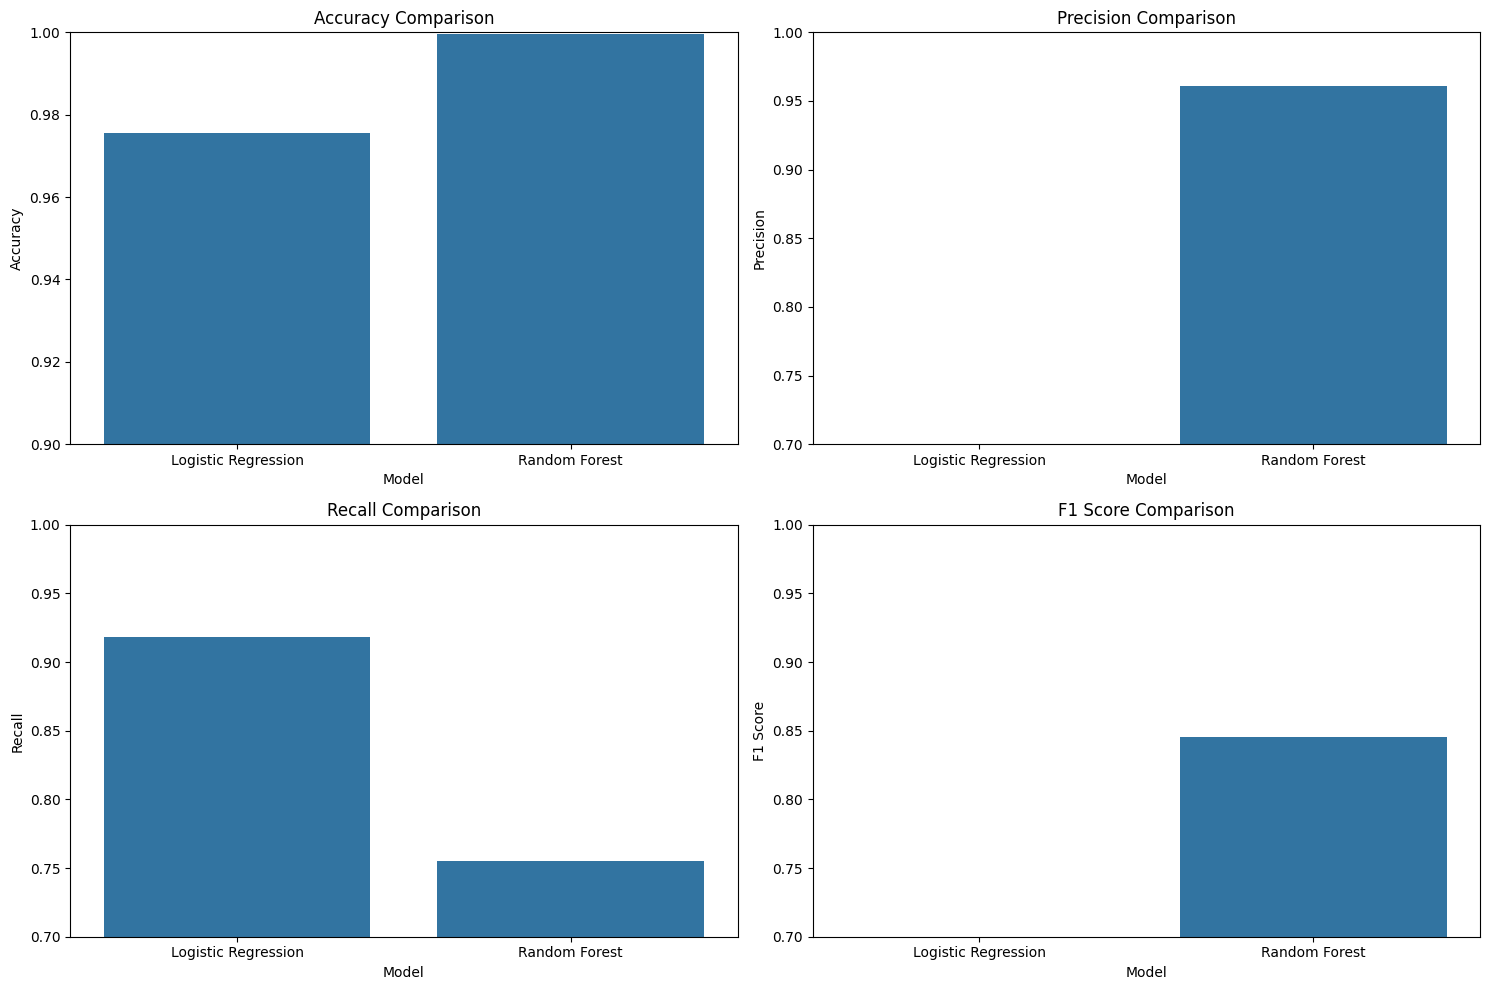

In [60]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.barplot(x='Model', y='Accuracy', data=comparison_df)
plt.title('Accuracy Comparison')
plt.ylim(0.9, 1.0)

plt.subplot(2, 2, 2)
sns.barplot(x='Model', y='Precision', data=comparison_df)
plt.title('Precision Comparison')
plt.ylim(0.7, 1.0)

plt.subplot(2, 2, 3)
sns.barplot(x='Model', y='Recall', data=comparison_df)
plt.title('Recall Comparison')
plt.ylim(0.7, 1.0)

plt.subplot(2, 2, 4)
sns.barplot(x='Model', y='F1 Score', data=comparison_df)
plt.title('F1 Score Comparison')
plt.ylim(0.7, 1.0)

plt.tight_layout()
plt.show()

### ROC Curve comparison

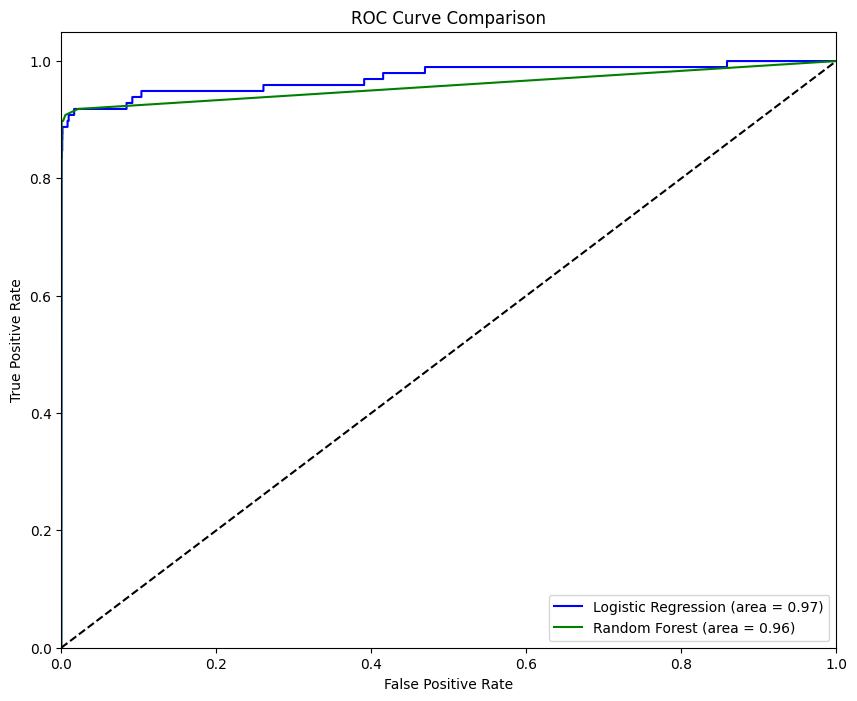

In [61]:
plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, 'b-', label=f'Logistic Regression (area = {roc_auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, 'g-', label=f'Random Forest (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()

### Precision-Recall Curve comparison

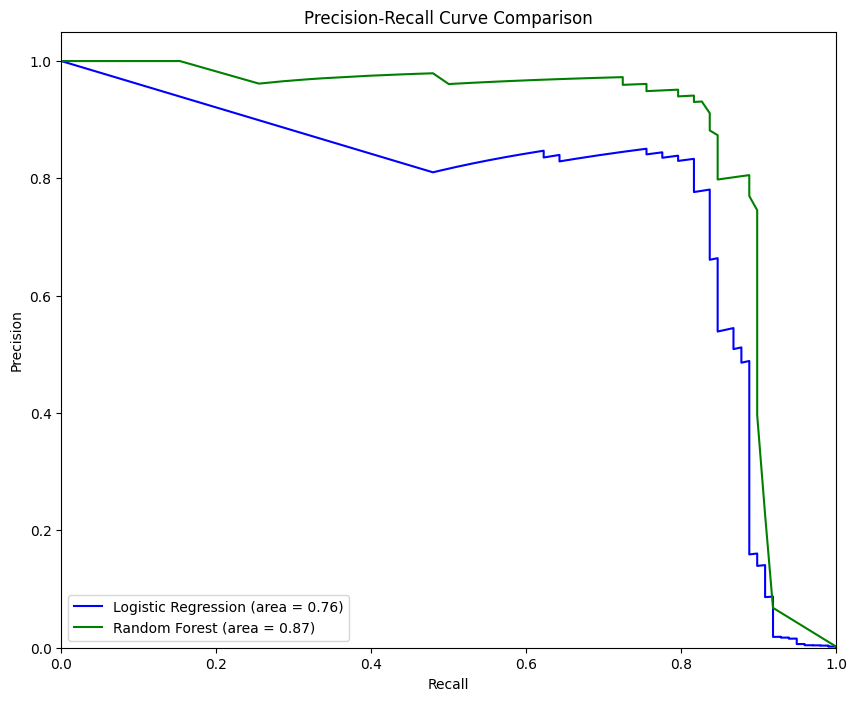

In [62]:
plt.figure(figsize=(10, 8))
plt.plot(recall_lr_curve, precision_lr_curve, 'b-', label=f'Logistic Regression (area = {pr_auc_lr:.2f})')
plt.plot(recall_rf_curve, precision_rf_curve, 'g-', label=f'Random Forest (area = {pr_auc_rf:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend(loc="lower left")
plt.show()

## Conclusion

In [65]:
best_model = comparison_df.iloc[comparison_df['F1 Score'].argmax()]['Model']
best_f1 = comparison_df['F1 Score'].max()

print(f"Based on F1 Score, the best performing model is {best_model} with a score of {best_f1:.4f}.")

Based on F1 Score, the best performing model is Random Forest with a score of 0.8457.
